In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score,r2_score,confusion_matrix
from sklearn.metrics import mean_squared_error, mean_squared_log_error, mean_absolute_error
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import SelectKBest, chi2
import warnings



In [2]:
df=pd.read_csv('diabetes.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
warnings.filterwarnings('ignore')

In [5]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


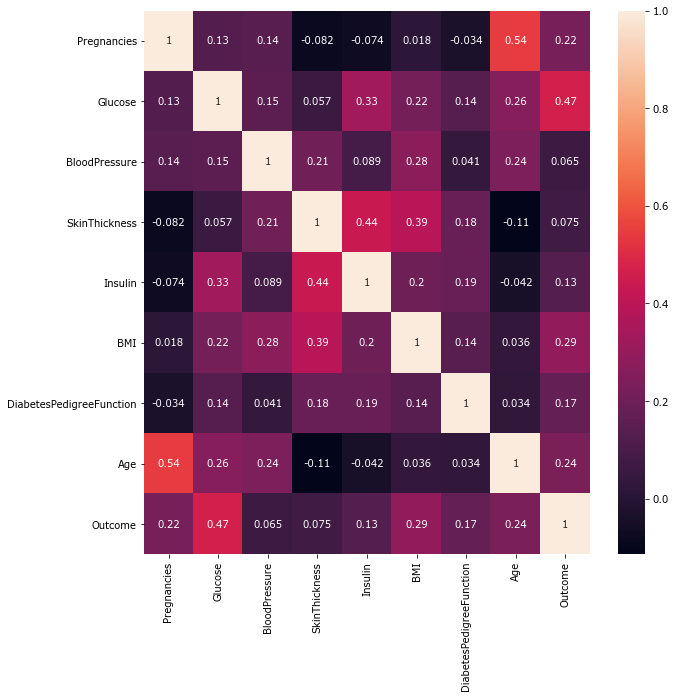

In [6]:
# Checking correlation with heatmap
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

# Based on correlation we can see that Blood pressure and SkinThickness contribute very less to the Outcome hence will drop these features

In [7]:
x=df.drop('Outcome', axis=1)
y=df['Outcome']

In [8]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


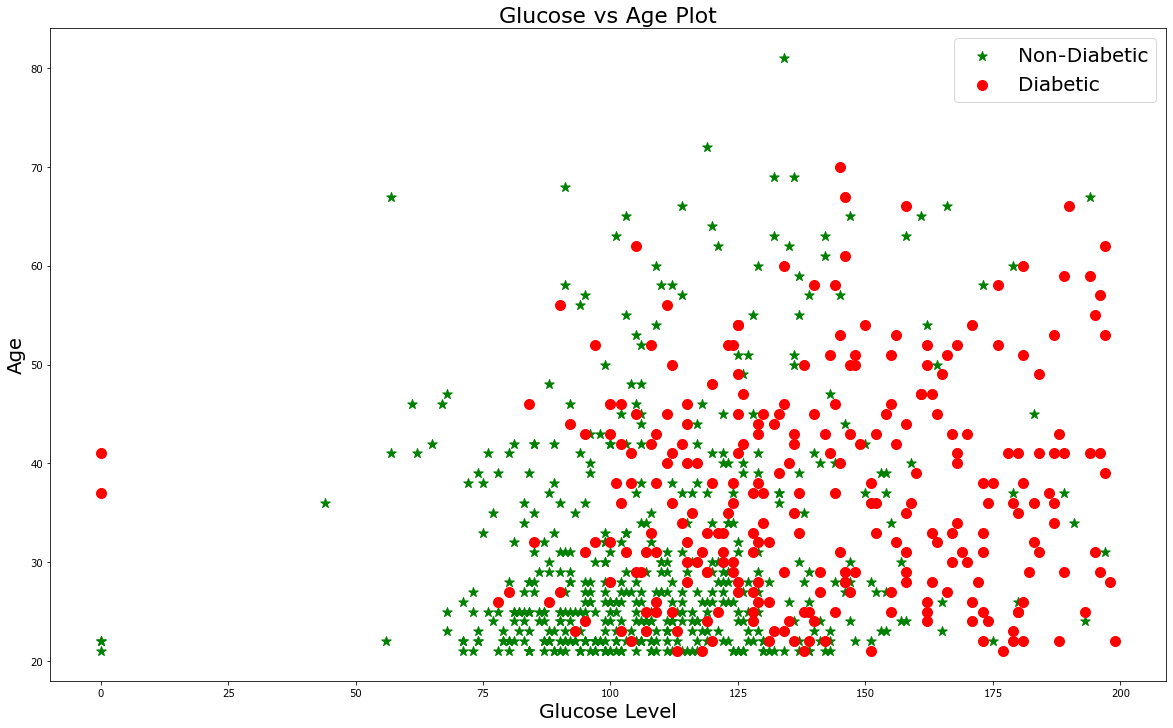

In [122]:
plt.figure(figsize=(20,12))
ax=plt.scatter(df['Glucose'][df['Outcome']==0],df['Age'][df['Outcome']==0], c='Green', marker='*', s=100)
ax=plt.scatter(df['Glucose'][df['Outcome']==1],df['Age'][df['Outcome']==1], c='Red',s=100)
plt.legend(['Non-Diabetic','Diabetic'], fontsize=20)
plt.xlabel('Glucose Level', fontsize=20)
plt.ylabel('Age',fontsize=20)
plt.title('Glucose vs Age Plot', fontsize=22);
plt.savefig('Glucose vs Age Plot.png')

In [9]:
x_best_feature=SelectKBest(chi2,k=8).fit(x,y)

In [10]:
x_best_df=pd.DataFrame(x_best_feature.scores_)
x_best_cols=pd.DataFrame(x.columns)

In [11]:
x_df=pd.concat([x_best_df,x_best_cols], axis=1)

In [12]:
x_df.columns=['Scores','Columns']

In [13]:
x_df.nlargest(8,'Scores')

,Scores,Columns
4,2175.565273,Insulin
1,1411.887041,Glucose
7,181.303689,Age
5,127.669343,BMI
0,111.519691,Pregnancies
3,53.108040,SkinThickness
2,17.605373,BloodPressure
6,5.392682,DiabetesPedigreeFunction


In [14]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# From above analysis we can see that Blood Pressure contributes least hence we would eliminate it from df

In [15]:
df_mod=df.drop('BloodPressure',axis=1)

In [16]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [17]:
# Now lets find if there are any outliers in df

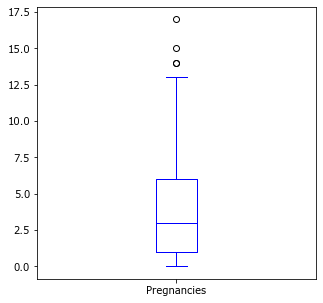

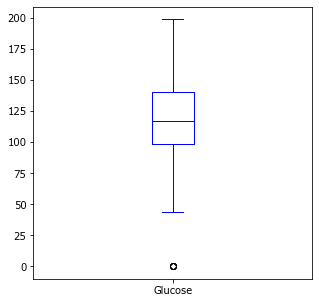

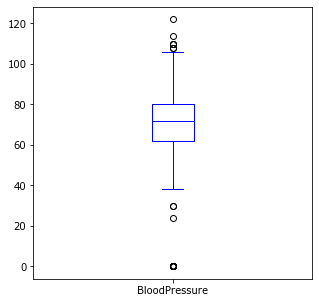

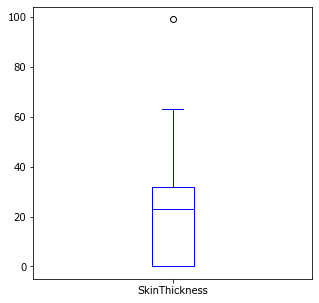

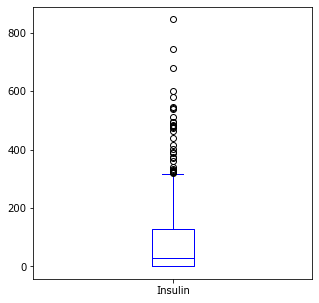

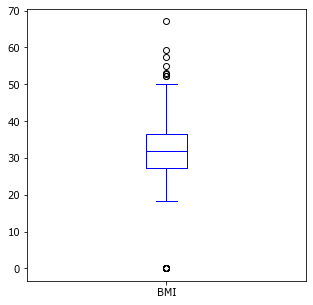

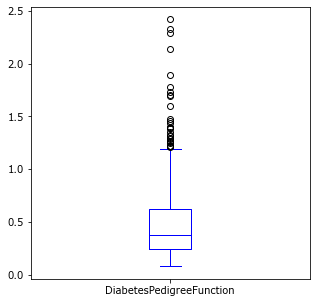

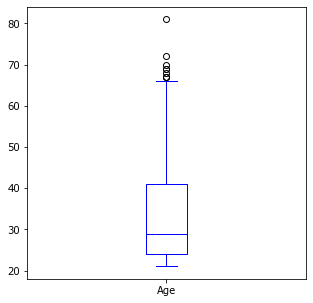

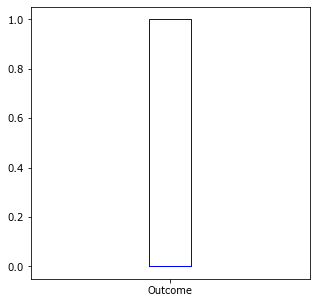

In [18]:
for col in df.columns:
    plt.figure(figsize=(5,5,))
    df.boxplot(col, color='blue', grid=False)

In [19]:
len(df)

768

In [20]:
df.SkinThickness.value_counts()

0     227
32     31
30     27
27     23
23     22
33     20
18     20
28     20
31     19
39     18
19     18
29     17
37     16
26     16
22     16
40     16
25     16
35     15
41     15
36     14
15     14
17     14
20     13
24     12
42     11
13     11
21     10
34      8
46      8
38      7
12      7
14      6
16      6
11      6
43      6
45      6
10      5
44      5
48      4
47      4
50      3
49      3
54      2
52      2
7       2
8       2
60      1
56      1
63      1
51      1
99      1
Name: SkinThickness, dtype: int64

## We can see that there are 227 values that are of 0 skinthickness which is not possible in real life.
## Hence we will replace these values with median values

In [21]:
df['SkinThickness'].replace(to_replace=0,value=df['SkinThickness'].median(), inplace=True)

In [22]:
df['SkinThickness'].value_counts() 
# now we have replaced 0 with 23 i.e. median value of Skin Thickness

23    249
32     31
30     27
27     23
33     20
28     20
18     20
31     19
19     18
39     18
29     17
22     16
25     16
26     16
37     16
40     16
35     15
41     15
17     14
15     14
36     14
20     13
24     12
42     11
13     11
21     10
34      8
46      8
38      7
12      7
11      6
16      6
45      6
14      6
43      6
44      5
10      5
48      4
47      4
50      3
49      3
8       2
7       2
52      2
54      2
63      1
51      1
56      1
60      1
99      1
Name: SkinThickness, dtype: int64

In [23]:
df.Pregnancies.value_counts()

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

In [24]:
# we will drop rows with pregnancy value more than 14
df_mod=df[df['Pregnancies']<14]

In [25]:
df_mod

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,23,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,23,0,30.1,0.349,47,1


In [26]:
x=df_mod.drop('Outcome',axis=1)
y=df_mod['Outcome']

# now lets create train and test split

In [27]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [28]:
# Modelling

In [29]:
model_test_scores={}
model_train_scores={}
def model_predict_score(models):
    for model_name, model in models.items():
        model.fit(x_train,y_train)
        model_train_scores[model_name]=model.score(x_train,y_train)
        model_test_scores[model_name]=model.score(x_test,y_test)
    train_scores=print(f'Training Score:\n {model_train_scores}')
    test_scores=print(f'Testing Score:\n {model_test_scores}')
    return train_scores,test_scores
        

In [30]:
models={'RandomForestClassifier':RandomForestClassifier(),
       'LogisticRegression':LogisticRegression(),
       'GradientBoostingClassifier':GradientBoostingClassifier(),
       'GaussianNaiveBayes':GaussianNB(),
       'KNeighbors':KNeighborsClassifier()}
model_predict_score(models)

Training Score:
 {'RandomForestClassifier': 1.0, 'LogisticRegression': 0.7806873977086743, 'GradientBoostingClassifier': 0.9230769230769231, 'GaussianNaiveBayes': 0.7463175122749591, 'KNeighbors': 0.79050736497545}
Testing Score:
 {'RandomForestClassifier': 0.7908496732026143, 'LogisticRegression': 0.7973856209150327, 'GradientBoostingClassifier': 0.7908496732026143, 'GaussianNaiveBayes': 0.7712418300653595, 'KNeighbors': 0.7647058823529411}


(None, None)

In [31]:
def classification_confusion_scores(model,x_train,x_test,y_train,y_test):
    '''
    This function will return predicted values for passed model
    '''
    model.fit(x_train, y_train)
    y_preds=model.predict(x_test)
    conf_mat=confusion_matrix(y_test,y_preds)
    print(f'Confusion Matrix is: \n {conf_mat}\n')
    print(f'Classification Report is: \n {classification_report(y_test,y_preds)}')
    

# This is baseline modelling 
## we will try to improve model

In [32]:
def grid_search(model,params):
    '''This function will hypertune a model passed and return accuracy score'''
    gs_model=GridSearchCV(model,param_grid=params,cv=5, scoring='accuracy',n_jobs=-1, verbose=1)
    gs_model.fit(x_train,y_train)
    score=gs_model.best_score_
    best_params=gs_model.best_params_
    return score, best_params
    
    

# Logistic Regression Hypertuning

In [33]:
log_model=LogisticRegression()
log_params={'penalty':['l1','l2','elasticnet'],
           'solver':['liblinear'],
           'C':[-4,4,20]}
grid_search(log_model,log_params)


Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 out of  45 | elapsed:    6.1s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    6.1s finished


(0.7675463148074103, {'C': 4, 'penalty': 'l1', 'solver': 'liblinear'})

In [34]:
log_params_2={'class_weight':['balanced']}
grid_search(log_model,log_params_2)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished


(0.7217646274823404, {'class_weight': 'balanced'})

# Random Forest Hypertuning

In [35]:
random_model=RandomForestClassifier()
random_params={'n_estimators':range(10,100,20),
              'max_features':['sqrt'],
              'max_depth':[5,6,7,8],
              'min_samples_split':[8],
              'min_samples_leaf':[50]}
grid_search(random_model,random_params)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   14.4s finished


(0.7430761028921764,
 {'max_depth': 5,
  'max_features': 'sqrt',
  'min_samples_leaf': 50,
  'min_samples_split': 8,
  'n_estimators': 30})

### we eliminate Random Forest as it is Overfitting on data. Its training score is 1 and testing score is 0.74 which has huge difference


# Gradient Boosting Hypertuning

In [36]:
grad_model=GradientBoostingClassifier()
grad_params={'n_estimators':[70],
              'max_features':['sqrt'],
              'max_depth':[20],
              'min_samples_split':range(100,1001,100),
              'min_samples_leaf':[10,51,10],
            'learning_rate':[0.1]}
grid_search(grad_model,grad_params)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    7.7s finished


(0.7659736105557776,
 {'learning_rate': 0.1,
  'max_depth': 20,
  'max_features': 'sqrt',
  'min_samples_leaf': 51,
  'min_samples_split': 200,
  'n_estimators': 70})

### we will try to find the classification report and confusion matrix using best params for gradient bossting

In [37]:
grad_model_best=GradientBoostingClassifier(learning_rate= 0.1,
                                           max_depth= 20,
                                           max_features= 'sqrt',
                                           min_samples_leaf= 10,
                                           min_samples_split= 400,
                                           n_estimators= 70)
classification_confusion_scores(grad_model_best)

TypeError: classification_confusion_scores() missing 4 required positional arguments: 'x_train', 'x_test', 'y_train', and 'y_test'

## As we can see Gradient Boosting has good precision and recall values;

# KNeighbors hypertuning

In [ ]:

k_model=KNeighborsClassifier()
params={'p':[1],
       'n_neighbors':range(10,100,10),
       'leaf_size':[10,20,30,50]}
grid_search(k_model,params)

In [ ]:
k_model=KNeighborsClassifier()
params={}
grid_search(k_model,params)

In [ ]:
k_model_best=KNeighborsClassifier(leaf_size=10, n_neighbors= 20, p= 1)
classification_confusion_scores(k_model_best)

In [ ]:
classification_confusion_scores(grad_model_best)

In [ ]:
log_model_best=LogisticRegression(C= 4, penalty= 'l1', solver= 'liblinear')
classification_confusion_scores(log_model_best)

In [ ]:
gaussian_model=GaussianNB()
gauss_params={}
grid_search(gaussian_model,gauss_params)
classification_confusion_scores(gaussian_model)

# Hence from above scores we can say that Gradient Descent model is performing best with approx 77% accuracy

# Now we will try to experiment with dataset and try to remodel and check scores again

### We will drop the column Skinthickness as it had very less correlation with outcome columns

In [ ]:
df.head()

In [ ]:
df_2=df.drop(['BloodPressure','SkinThickness'], axis=1)

In [ ]:
df_2.head()

In [ ]:
x_2=df_2.drop('Outcome',axis=1)
y_2=df_2['Outcome']

In [ ]:
x2_train, x2_test, y2_train, y2_test =train_test_split(x_2,y_2,test_size=0.2,random_state=42)

In [ ]:
model_test_scores={}
model_train_scores={}
def model_predict_score_2(models,x_train,x_test,y_train,y_test):
    for model_name, model in models.items():
        model.fit(x_train,y_train)
        model_train_scores[model_name]=model.score(x_train,y_train)
        model_test_scores[model_name]=model.score(x_test,y_test)
    train_scores=print(f'Training Score:\n {model_train_scores}')
    test_scores=print(f'Testing Score:\n {model_test_scores}')
    return train_scores,test_scores
        

In [ ]:
models={'RandomForestClassifier':RandomForestClassifier(),
       'LogisticRegression':LogisticRegression(),
       'GradientBoostingClassifier':GradientBoostingClassifier(),
       'GaussianNaiveBayes':GaussianNB(),
       'KNeighbors':KNeighborsClassifier()}
model_predict_score_2(models,x2_train, x2_test, y2_train, y2_test)

In [ ]:
models=[RandomForestClassifier(),LogisticRegression(),
       GradientBoostingClassifier(),GaussianNB(),
       KNeighborsClassifier()]
for model in models:
    print(f'Scores of {model} :\n')
    print(f'{classification_confusion_scores(model,x2_train, x2_test, y2_train, y2_test)}\n')

# Here also we can see that Gradient Boosting is performing well
# Lets try to Hypertune Gradient Boosting 

In [ ]:

grad_model_2=GradientBoostingClassifier()
grad_params={'n_estimators':range(10,101,20),
              'max_features':['sqrt'],
              'max_depth':[20],
              'min_samples_split':range(100,1001,200),
              'min_samples_leaf':[10],
            'learning_rate':[0.1]}
grid_search(grad_model_2,grad_params)

In [ ]:
grad_model_2=GradientBoostingClassifier(learning_rate=0.1,
  max_depth= 20,
  max_features= 'sqrt',
  min_samples_leaf= 10,
  min_samples_split= 300,
  n_estimators= 50)

In [ ]:
classification_confusion_scores(grad_model_2)

# We can see that default parameters for Gradient Boosting are performing well

# Now we will again experiment with dataset

In [ ]:
df_3=df.drop(['BloodPressure','DiabetesPedigreeFunction'], axis=1)

In [ ]:
df_3.head()

In [ ]:
x_3=df_2.drop('Outcome',axis=1)
y_3=df_2['Outcome']

In [ ]:
x3_train, x3_test, y3_train, y3_test =train_test_split(x_3,y_3,test_size=0.2,random_state=42)

In [ ]:
models={'RandomForestClassifier':RandomForestClassifier(),
       'LogisticRegression':LogisticRegression(),
       'GradientBoostingClassifier':GradientBoostingClassifier(),
       'GaussianNaiveBayes':GaussianNB(),
       'KNeighbors':KNeighborsClassifier()}
model_predict_score_2(models,x3_train, x3_test, y3_train, y3_test)

In [ ]:
models=[RandomForestClassifier(),LogisticRegression(),
       GradientBoostingClassifier(),GaussianNB(),
       KNeighborsClassifier()]
for model in models:
    print(f'Scores of {model} :\n')
    print(f'{classification_confusion_scores(model,x3_train, x3_test, y3_train, y3_test)}\n')

In [ ]:
df_4=df.drop(['BloodPressure'], axis=1)

In [ ]:
models={'RandomForestClassifier':RandomForestClassifier(),
       'LogisticRegression':LogisticRegression(),
       'GradientBoostingClassifier':GradientBoostingClassifier(),
       'GaussianNaiveBayes':GaussianNB(),
       'KNeighbors':KNeighborsClassifier()}
def full_model_score(models,df,drop_col):
    x=df.drop(drop_col,axis=1)
    y=df[drop_col]
    x_train, x_test, y_train, y_test =train_test_split(x,y,test_size=0.2,random_state=42)
    print(f'{model_predict_score_2(models,x_train, x_test, y_train, y_test)}\n')
    
    
    for model_name, model in models.items():
        print(f'Scores of {model} :\n')
        
        print(f'{classification_confusion_scores(model,x_train, x_test, y_train, y_test)}\n')

In [ ]:
full_model_score(models,df_4,drop_col='Outcome')

# Now from all the above analysis it is clear that Gradient Boosting with 1st dataset i.e. with all columns is performing the best and gives accuracy of approx 77%

In [56]:
grad_model=GradientBoostingClassifier(learning_rate= 0.1,
  max_depth=20,
  max_features= 'sqrt',
  min_samples_leaf= 51,
  min_samples_split= 200,
  n_estimators= 70)
grad_model.fit(x_train,y_train)
print(f'Training Score :{grad_model.score(x_train,y_train)}')
print(f'Testing Score :{grad_model.score(x_test,y_test)}')
y_preds=grad_model.predict(x_test)


Training Score :0.8363338788870703
Testing Score :0.7908496732026143


In [62]:
y_pred_df=pd.DataFrame(y_preds)

In [67]:
y_test['Outcome']

360    1
261    1
754    1
195    1
336    0
      ..
60     0
555    0
345    0
327    0
246    0
Name: Outcome, Length: 153, dtype: int64

In [71]:
diabetes_final=pd.DataFrame({'Actual':y_test['Outcome'], 'Predicted':y_preds, 'True/False':y_test['Outcome']==y_preds})

In [72]:
diabetes_final

,Actual,Predicted,True/False
360,1,1,True
261,1,1,True
754,1,1,True
195,1,1,True
336,0,1,False
...,...,...,...
60,0,0,True
555,0,0,True
345,0,1,False
327,0,1,False


In [73]:
diabetes_final.to_csv('diabetes_predicted.csv')

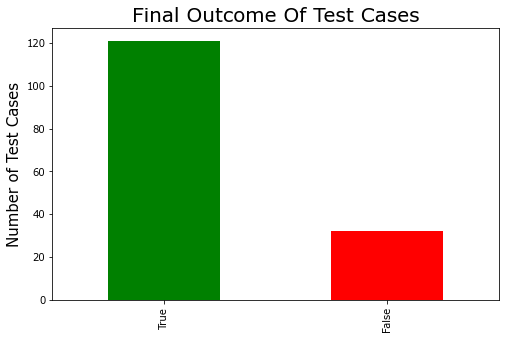

In [95]:
plt.figure(figsize=(8,5))
diabetes_final['True/False'].value_counts().plot(kind='bar', color=['Green','Red']);
plt.ylabel('Number of Test Cases',fontsize=15);
plt.title('Final Outcome Of Test Cases', fontsize=20)
plt.savefig('Final Outcome Of Test Cases.png')

<Figure size 432x288 with 0 Axes>